In [1]:
import sys

sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
from rumboost.rumboost import rum_train
from rumboost.datasets import load_preprocess_LPMC
from rumboost.utility_plotting import plot_2d
from rumboost.metrics import cross_entropy

import lightgbm

# Example: Attribute interactions

This notebook shows features implemented in RUMBoost through an example on the LPMC dataset, a mode choice dataset in London developed Hillel et al. (2018). You can find the original source of data [here](https://www.icevirtuallibrary.com/doi/suppl/10.1680/jsmic.17.00018) and the original paper [here](https://www.icevirtuallibrary.com/doi/full/10.1680/jsmic.17.00018).

We first load the preprocessed dataset and its folds for cross-validation. You can find the data under the Data folder

In [5]:
#load dataset
LPMC_train, LPMC_test, folds = load_preprocess_LPMC(path="../Data/")

## Attribute interactions model

We arbitrarily allow for the age and the travel time to interact. To do so, we update the ```'interaction_constraints'``` values of the model in the ```rum_structure``` dictionary. We keep the same hyperparameters from rumboost, apart from the `max_depth` parameter which needs to be set to at least 2.

In [6]:
# parameters
general_params = {
    "n_jobs": -1,
    "num_classes": 4,  # important
    "verbosity": 1,  # specific RUMBoost parameter
    "num_iterations": 3000,
    "early_stopping_round": 100,
}

In [7]:
rum_structure = [
    {
        "utility": [0],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_walking",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 2,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0, 16],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
            ],
        },
        "shared": False,
    },
    {
        "utility": [1],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_cycling",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 2,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0, 16],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
            ],
        },
        "shared": False,
    },
    {
        "utility": [2],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_pt_access",
            "dur_pt_bus",
            "dur_pt_rail",
            "dur_pt_int_waiting",
            "dur_pt_int_walking",
            "pt_n_interchanges",
            "cost_transit",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 2,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
                -1,
                -1,
                -1,
                -1,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0, 18],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [19],
                [20],
                [21],
                [22],
            ],
        },
        "shared": False,
    },
    {
        "utility": [3],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_driving",
            "cost_driving_fuel",
            "congestion_charge",
            "driving_traffic_percent",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 2,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
                -1,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0, 16],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [17],
                [18],
                [19],
            ],
        },
        "shared": False,
    },
]

In [8]:
model_specification = {
    "general_params": general_params,
    "rum_structure": rum_structure,
}

### Training with 5-fold CV

In [9]:
#features and label column names
features = [f for f in LPMC_train.columns if f != "choice"]
label = "choice"

#create lightgbm dataset
lgb_train_set = lightgbm.Dataset(LPMC_train[features], label=LPMC_train[label], free_raw_data=False)
lgb_test_set = lightgbm.Dataset(LPMC_test[features], label=LPMC_test[label], free_raw_data=False)

ce_loss = 0
num_trees = 0

for i, (train_idx, test_idx) in enumerate(folds):
    train_set = lgb_train_set.subset(sorted(train_idx))
    test_set = lgb_train_set.subset(sorted(test_idx))

    print('-'*50 + '\n')
    print(f'Iteration {i+1}')
    LPMC_model_trained = rum_train(train_set, model_specification, valid_sets = [test_set])
    ce_loss += LPMC_model_trained.best_score
    num_trees += LPMC_model_trained.best_iteration
    print('-'*50 + '\n')
    print(f'Best cross entropy loss: {LPMC_model_trained.best_score}')
    print(f'Best number of trees: {LPMC_model_trained.best_iteration}')

ce_loss = ce_loss/5
num_trees = num_trees/5
print('-'*50 + '\n')
print(f'Cross validation negative cross entropy loss: {ce_loss}')
print(f'With a number of trees on average of {num_trees}')

--------------------------------------------------

Iteration 1
[LightGBM] [Info] Number of positive: 7667, number of negative: 36145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855


/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of data points in the train set: 43812, number of used features: 17
[LightGBM] [Info] Number of positive: 7667, number of negative: 36145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 43812, number of used features: 17
[LightGBM] [Info] Number of positive: 7667, number of negative: 36145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1828
[LightGBM] [Info] Number of data points in the train set: 43812, number of used features: 23
[LightGBM] [Info] Number of positive: 7667, number of negative

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]------NCE value on train set : 1.2912
---------NCE value on test set 1: 1.2898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 7667, number of negative: 36143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 43810, number of used features: 17
[LightGBM] [Info] Number of positive: 7667, number of negative: 36143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 43810, number of used features: 17
[LightGBM] [Info] Number of positive: 7667, number of negative: 36143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

### Testing the model on out-of-sample data

Now that we have the optimal number of trees (640), we can train the final version of the model on the full dataset, and test it on out-of-sample data with the ```predict()``` function. Note that the dataset must be a lightgbm object in the ```predict()``` function.

In [12]:
general_params["num_iterations"] = int(num_trees)
general_params["early_stopping_round"] = None

LPMCFI_model_fully_trained = rum_train(lgb_train_set, model_specification)

preds = LPMCFI_model_fully_trained.predict(lgb_test_set)

ce_test = cross_entropy(preds, lgb_test_set.get_label().astype(int))

print('-'*50)
print(f'Final negative cross-entropy on the test set: {ce_test}')

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 9584, number of negative: 45182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 54766, number of used features: 17
[LightGBM] [Info] Number of positive: 9584, number of negative: 45182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 54766, number of used features: 17
[LightGBM] [Info] Number of positive: 9584, number of negative: 45182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

### Plotting feature interaction on a contour plot

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/utility_plotting.py:152: UserWarning: linewidths is ignored by contourf
  c_plot = axes.contourf(


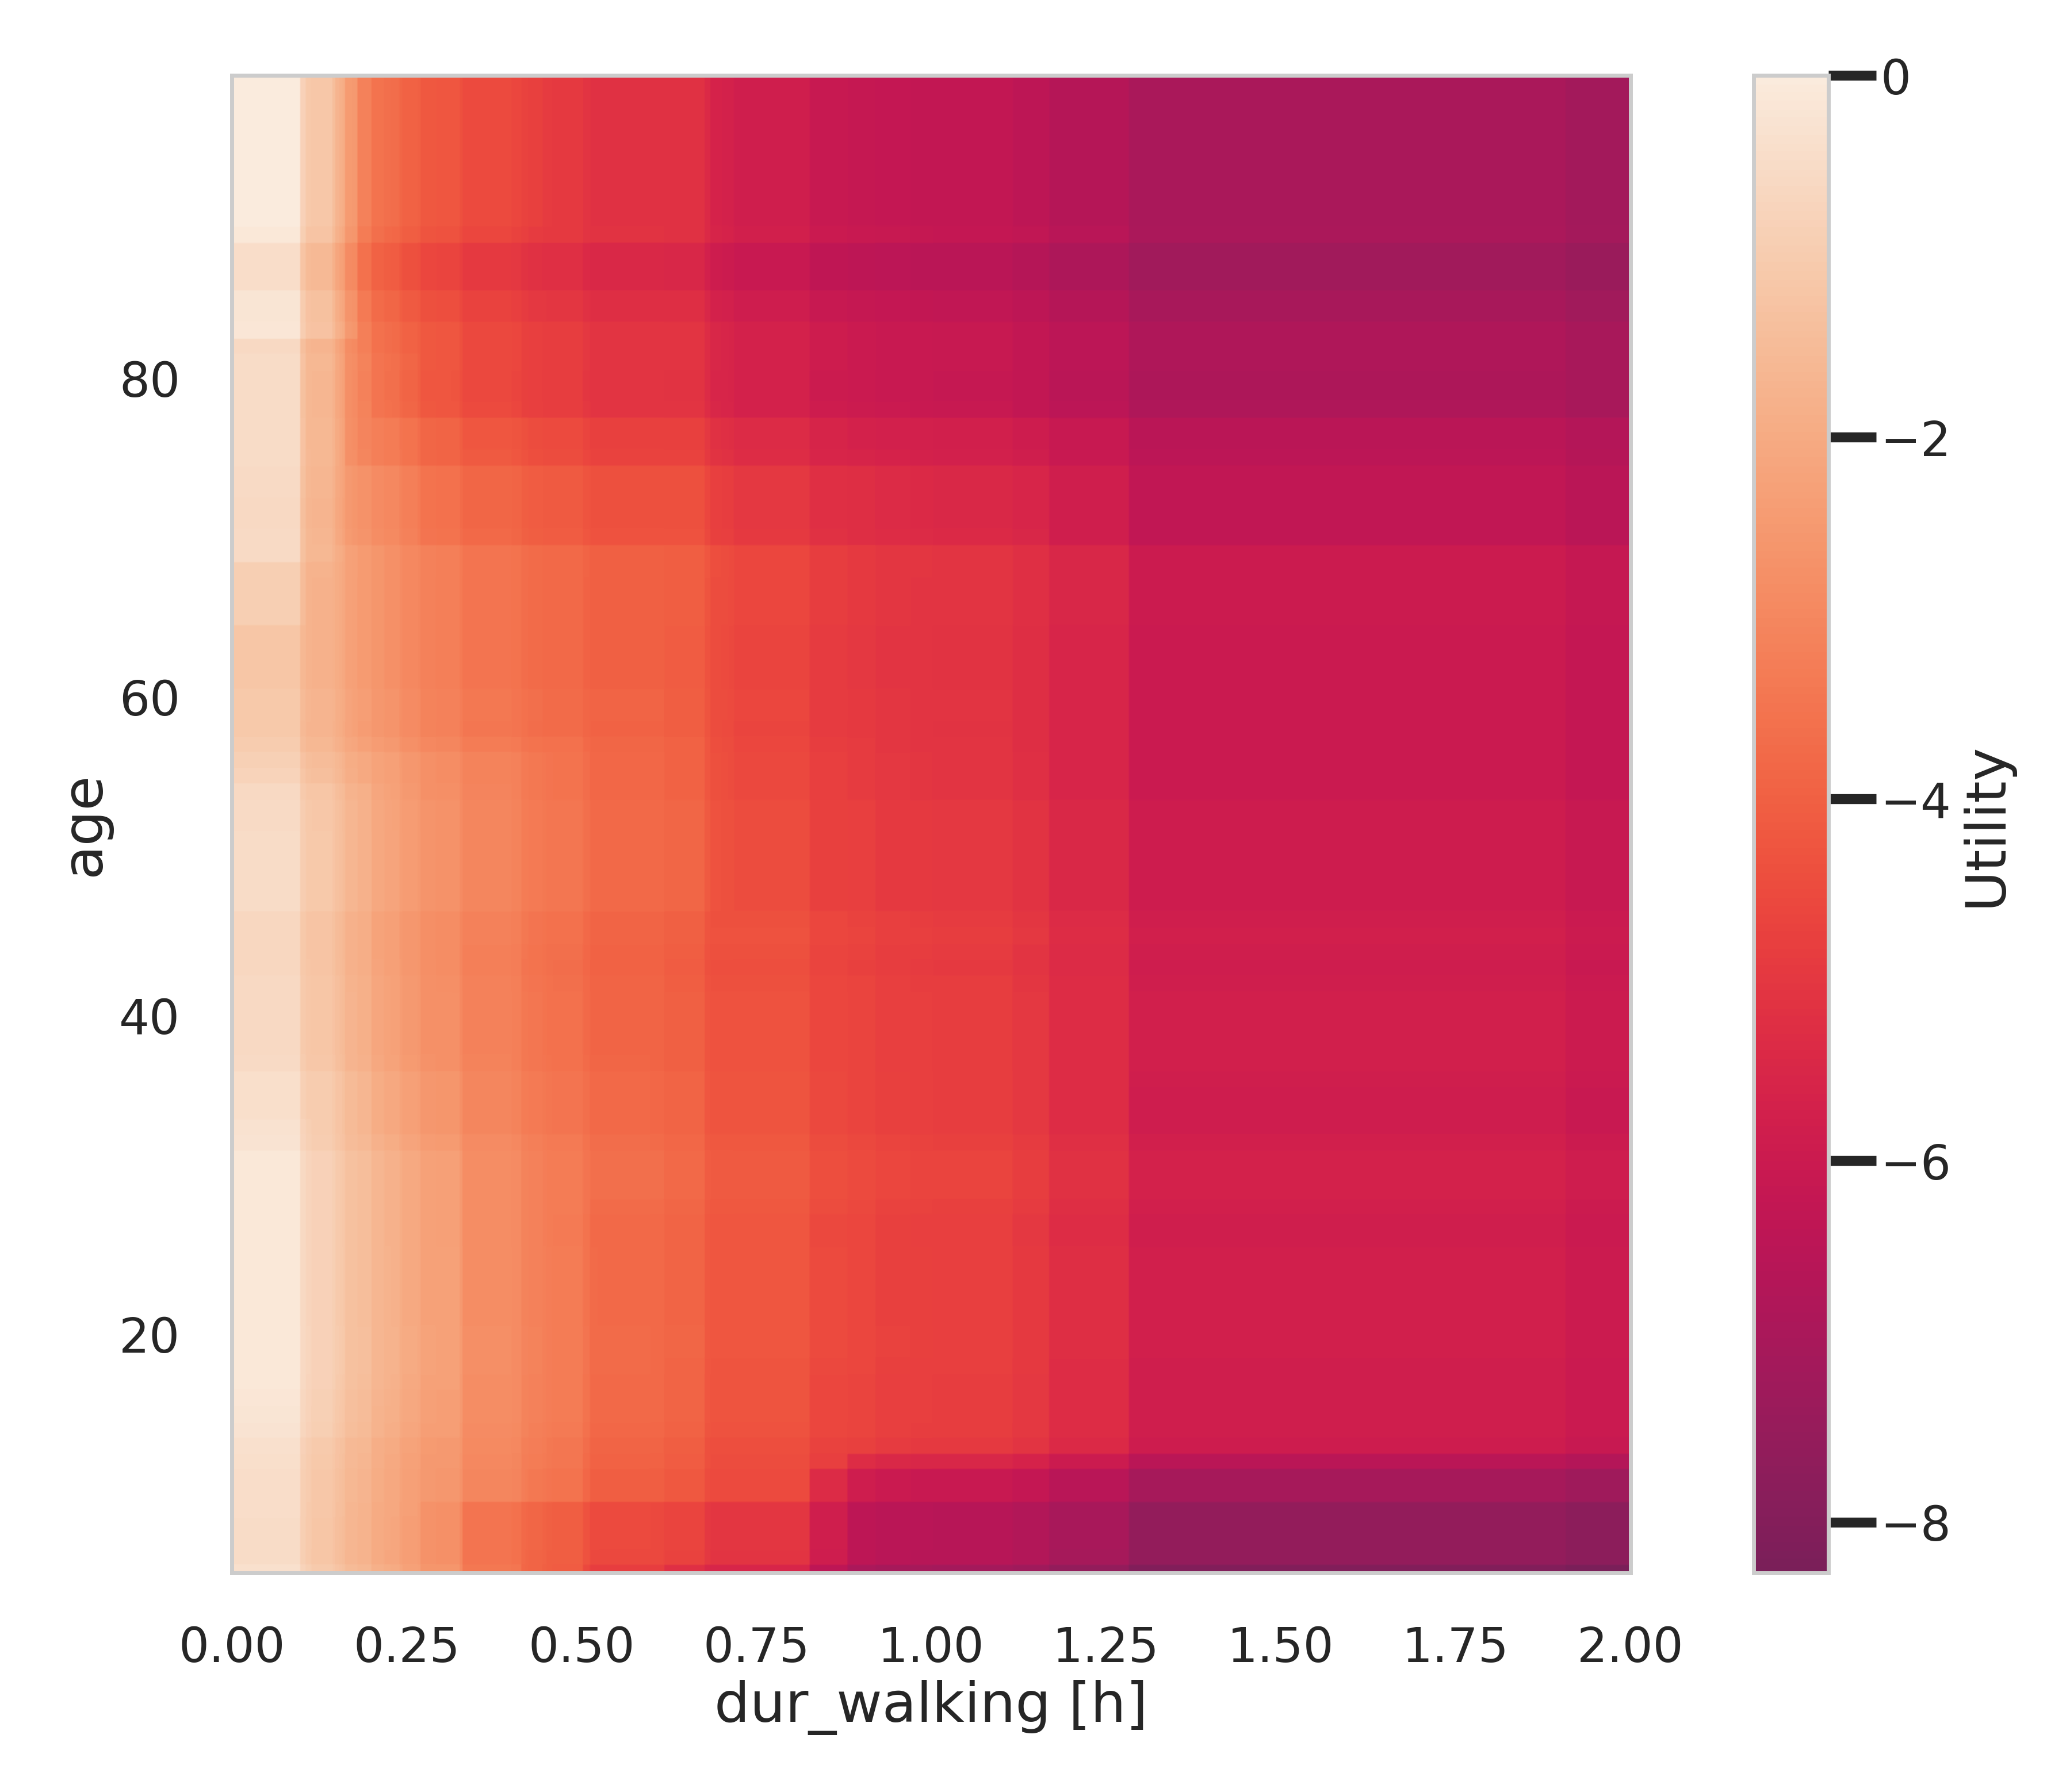

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/utility_plotting.py:152: UserWarning: linewidths is ignored by contourf
  c_plot = axes.contourf(


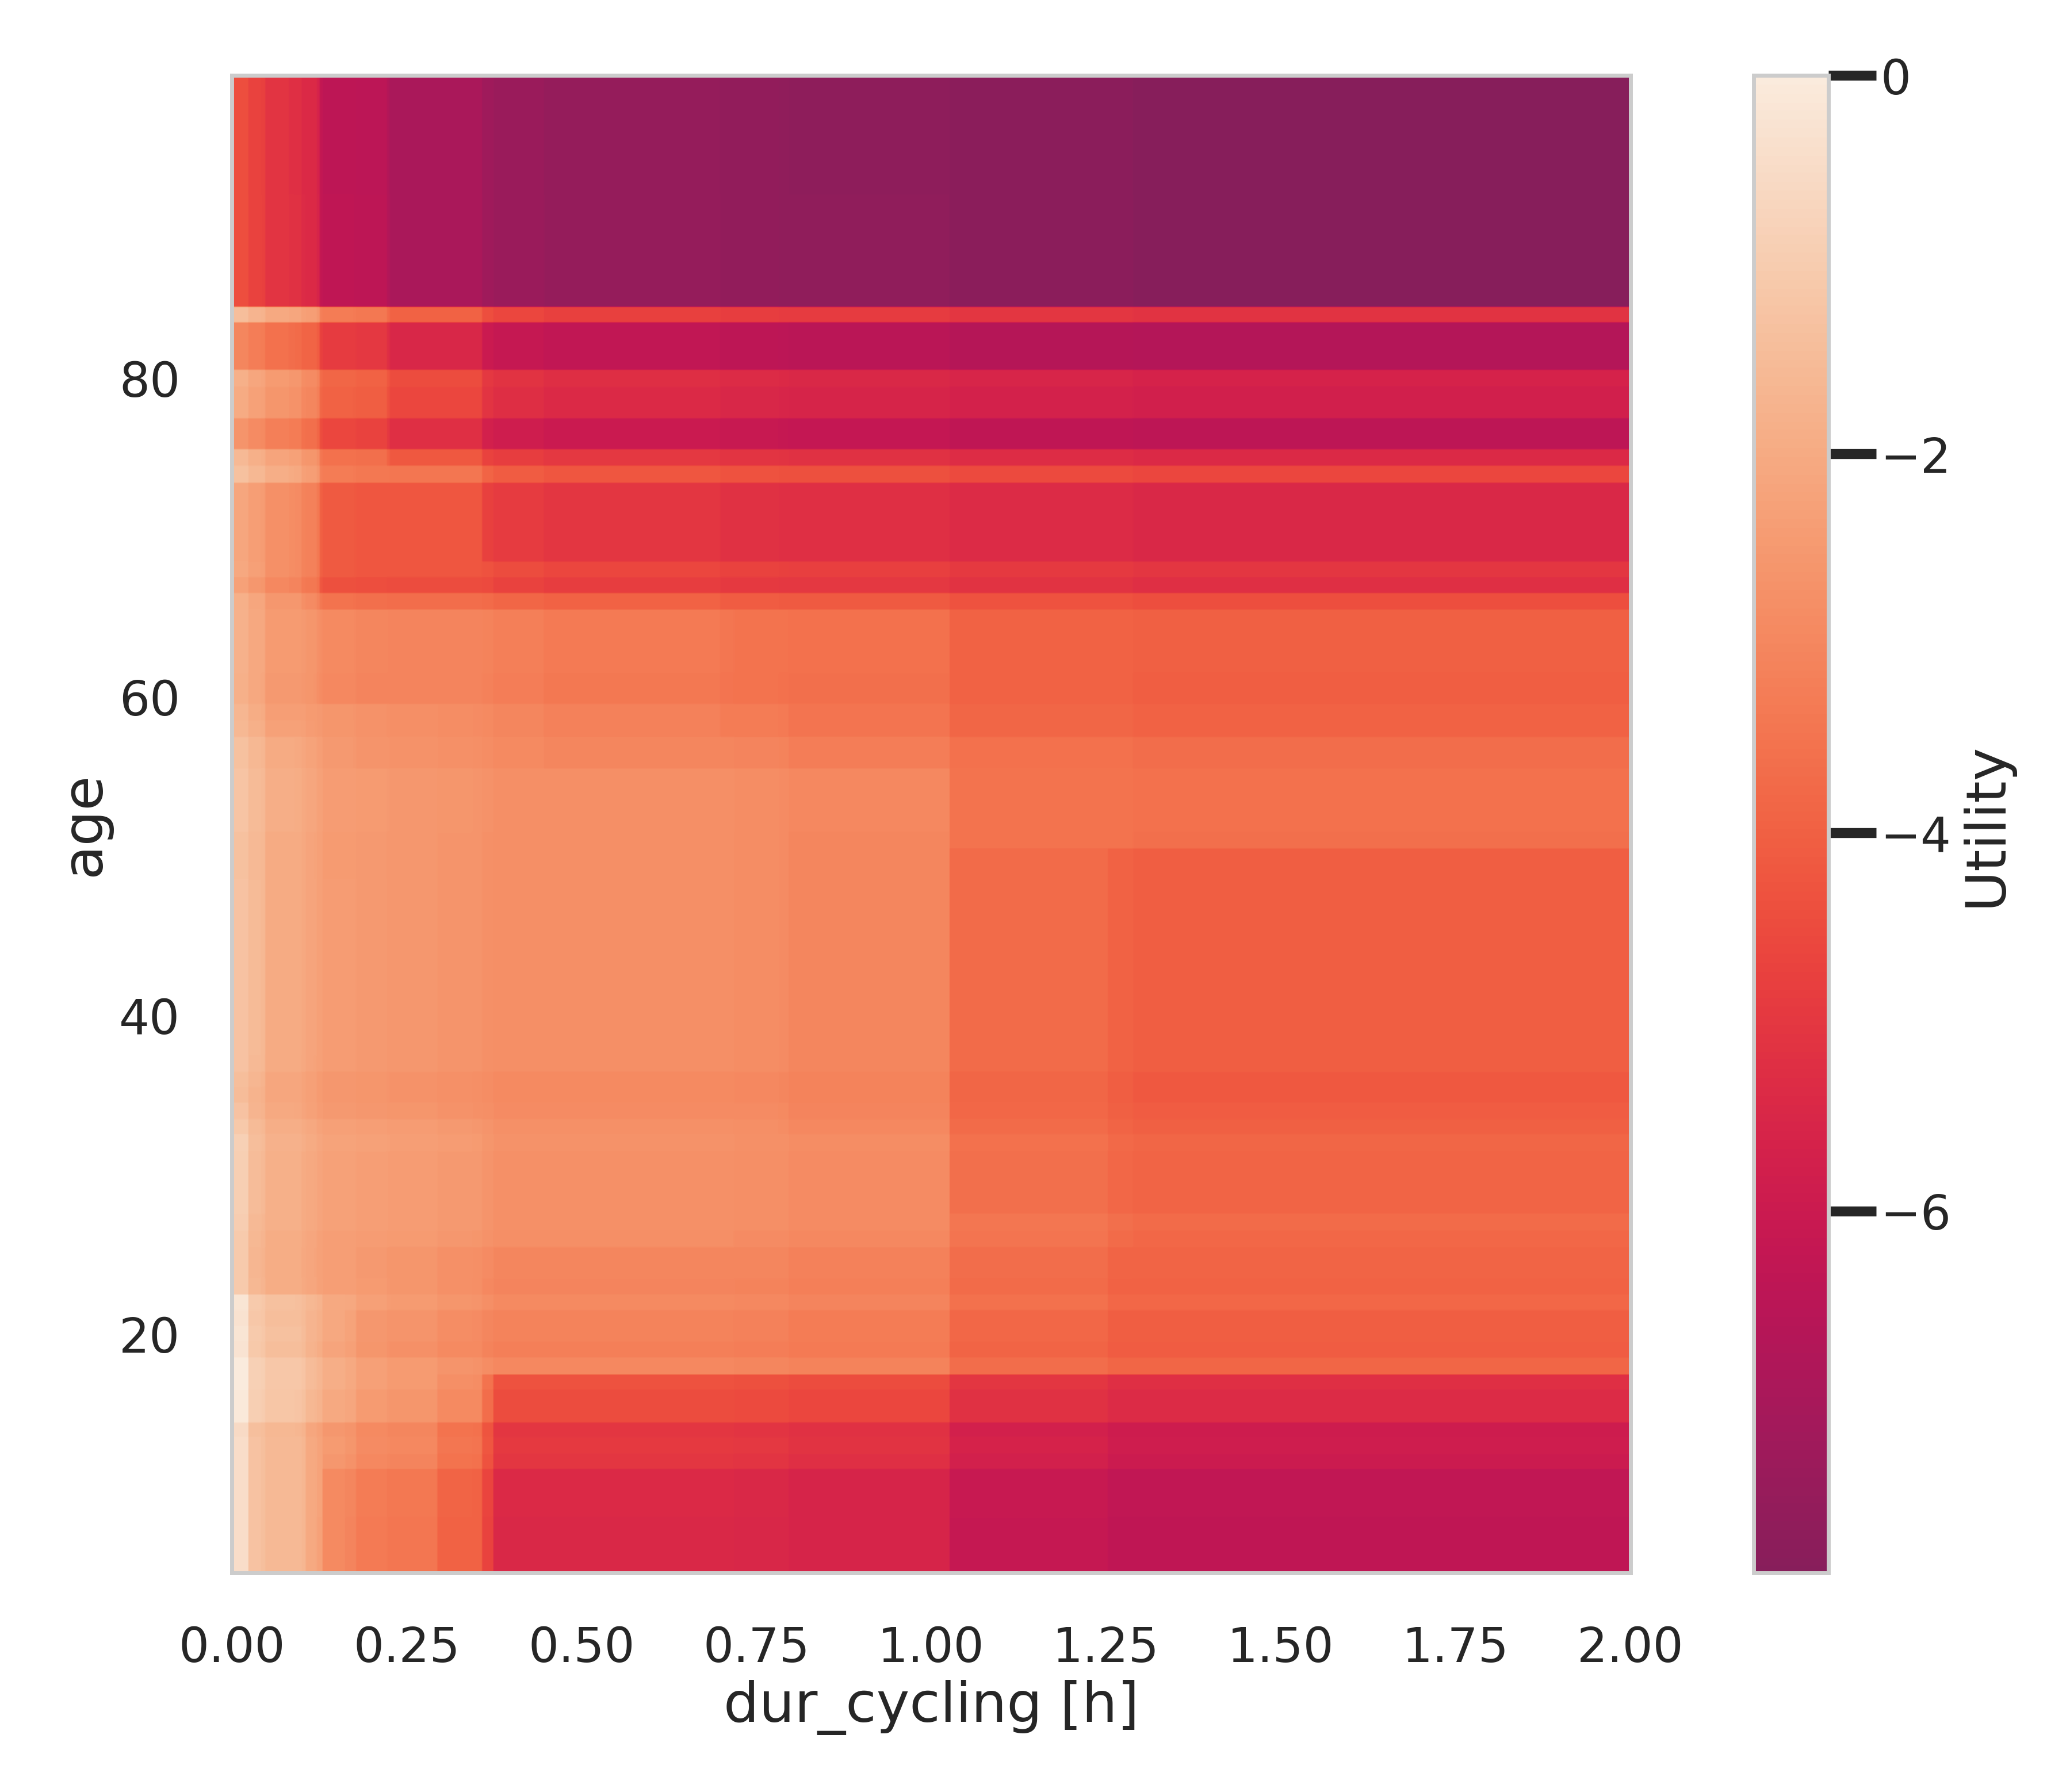

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/utility_plotting.py:152: UserWarning: linewidths is ignored by contourf
  c_plot = axes.contourf(


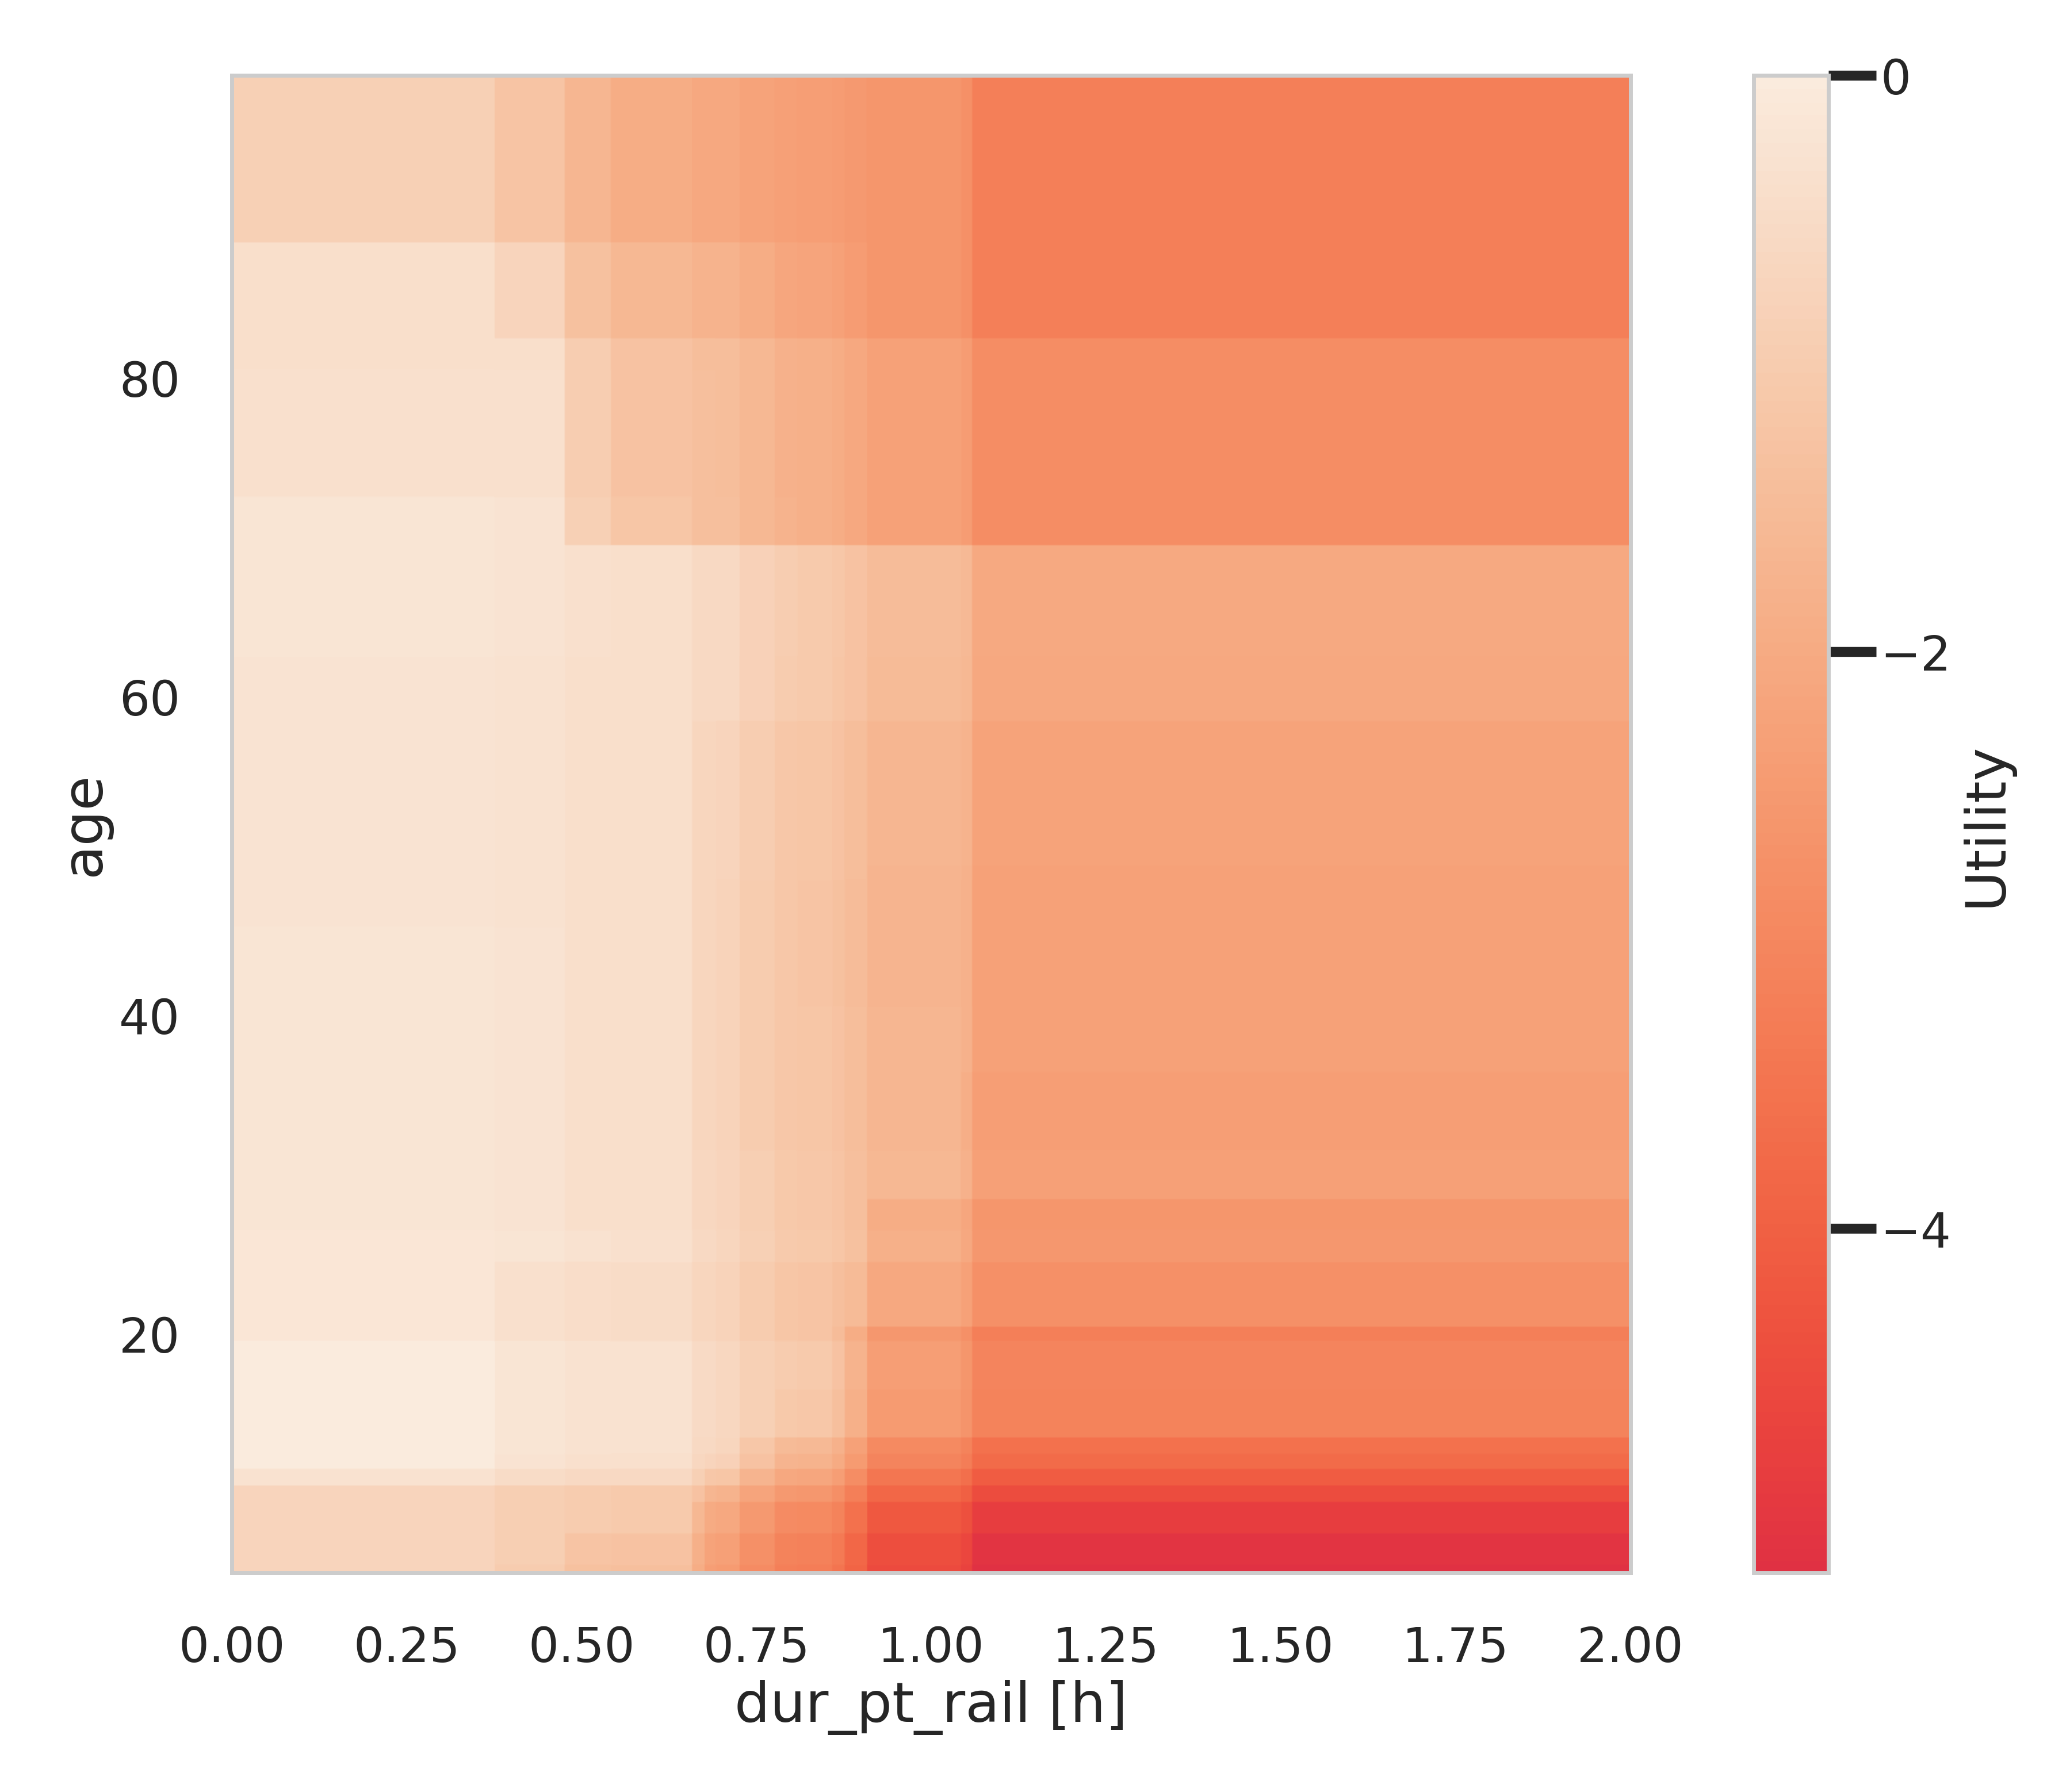

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/utility_plotting.py:152: UserWarning: linewidths is ignored by contourf
  c_plot = axes.contourf(


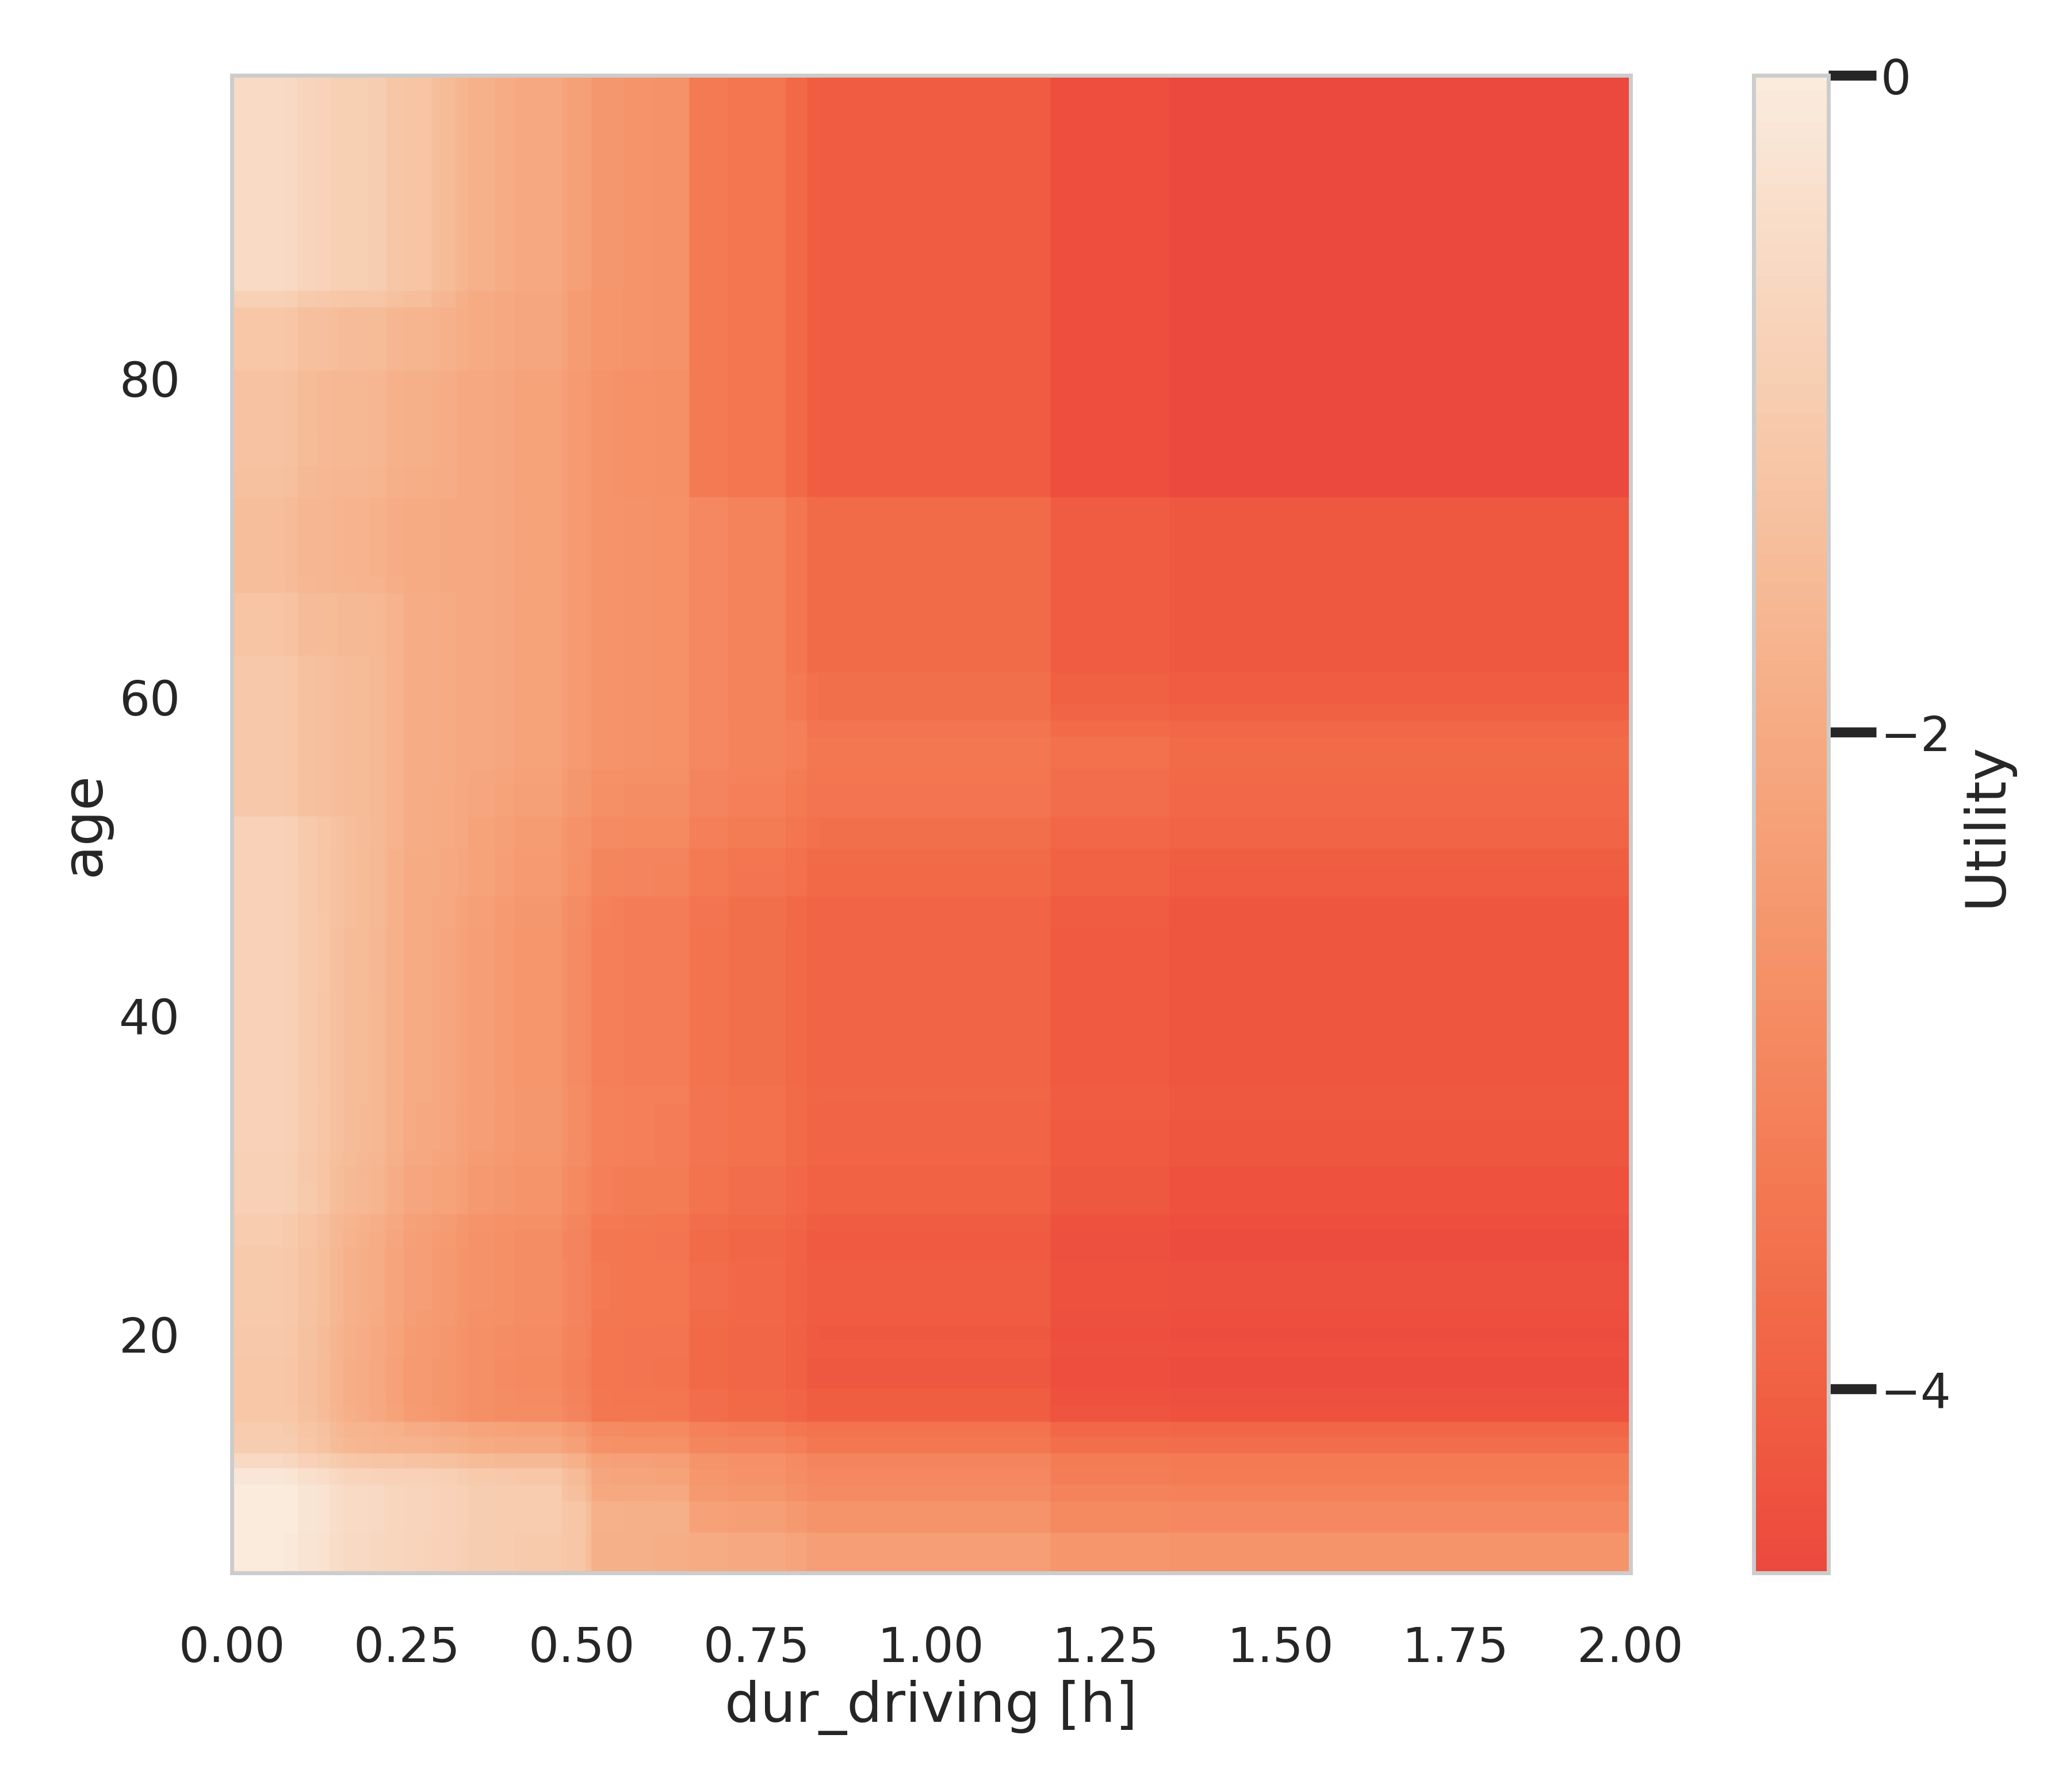

In [13]:
utility_names={'0': 'Walking', '1': 'Cycling', '2':'PT', '3':'Driving'}

plot_2d(LPMCFI_model_fully_trained, 'dur_walking', 'age', 0, 2, LPMC_train['age'].min(), LPMC_train['age'].max(), num_points=1000, save_figure=False)
plot_2d(LPMCFI_model_fully_trained, 'dur_cycling', 'age', 0, 2, LPMC_train['age'].min(), LPMC_train['age'].max(), num_points=1000, save_figure=False)
plot_2d(LPMCFI_model_fully_trained, 'dur_pt_rail', 'age', 0, 2, LPMC_train['age'].min(), LPMC_train['age'].max(), num_points=1000, save_figure=False)
plot_2d(LPMCFI_model_fully_trained, 'dur_driving', 'age', 0, 2, LPMC_train['age'].min(), LPMC_train['age'].max(), num_points=1000, save_figure=False)

# References

Salvadé, N., & Hillel, T. (2024). Rumboost: Gradient Boosted Random Utility Models. *arXiv preprint [arXiv:2401.11954](https://arxiv.org/abs/2401.11954)*

Hillel, T., Elshafie, M.Z.E.B., Jin, Y., 2018. Recreating passenger mode choice-sets for transport simulation: A case study of London, UK. Proceedings of the Institution of Civil Engineers - Smart Infrastructure and Construction 171, 29–42. https://doi.org/10.1680/jsmic.17.00018